# 概要

* ↓で説明してる「ラグランジュの未定乗数法の幾何的イメージ」のプロット
* https://www.youtube.com/watch?v=2-E4XiHQEcM

In [1]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# メッシュの点準備
mesh_points = np.linspace(0, 1, 101)
print(mesh_points)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [3]:
# メッシュのxy座標作成
xy = [(round(x, 2), round(y, 2)) for x, y in itertools.product(mesh_points, mesh_points)]
xy[:5]

[(0.0, 0.0), (0.0, 0.01), (0.0, 0.02), (0.0, 0.03), (0.0, 0.04)]

In [4]:
# 使いやすいようpandas DataFrameつくる
df = pd.DataFrame(xy, columns=('x', 'y'))
df

,x,y
0,0.0,0.00
1,0.0,0.01
2,0.0,0.02
3,0.0,0.03
4,0.0,0.04
...,...,...
10196,1.0,0.96
10197,1.0,0.97
10198,1.0,0.98
10199,1.0,0.99


In [5]:
# 最大最小を求める関数
def f(row):
    return row['x'] ** 2 + row['y'] ** 2

In [6]:
# 拘束条件(=0となる)の関数
def g(row):
    return row['x'] + row['y'] - 1

In [7]:
# fx, gx, zを求める
def calc_fx_gx_z(df, lambda_):
    df['fx'] = df.apply(f, axis=1)
    df['gx'] = df.apply(g, axis=1)
    df['z'] = df['fx'] - lambda_ * df['gx']
    return df

In [8]:
def plot_3d_graph(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # 拘束条件を満たさないもの
    df_1 = df[df['gx']!=0]
    ax.scatter(df_1['x'], df_1['y'], df_1['z'], s=1, color='blue')
    # 拘束条件を満たすもの
    df_2 = df[df['gx']==0]
    ax.scatter(df_2['x'], df_2['y'], df_2['z'], s=1, color='red')
    
    plt.show()

0.0


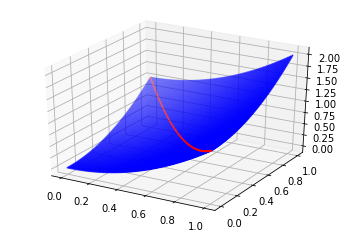

0.2


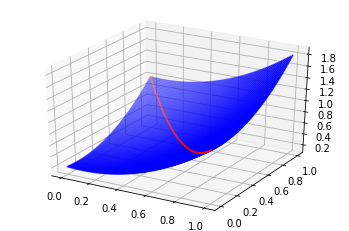

0.4


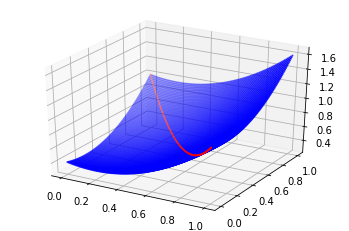

0.6


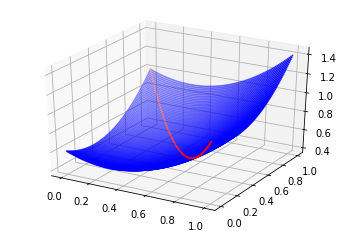

0.8


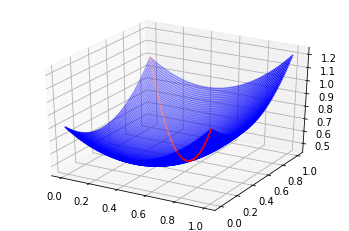

1.0


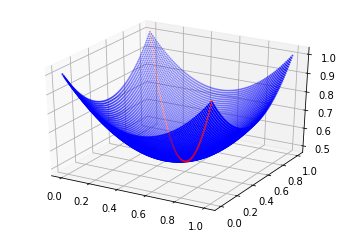

1.2


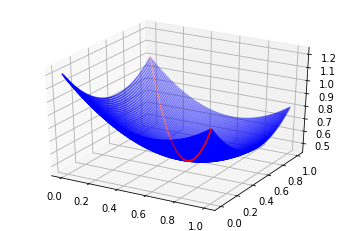

1.4


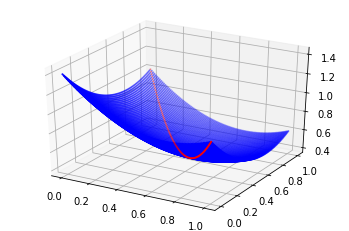

1.6


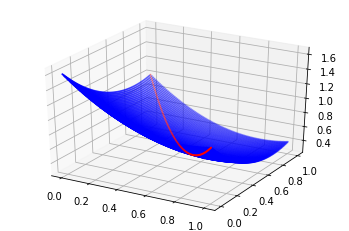

1.8


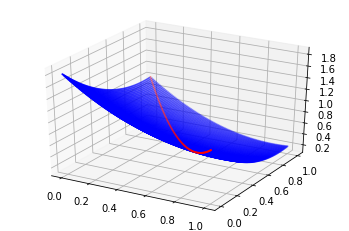

2.0


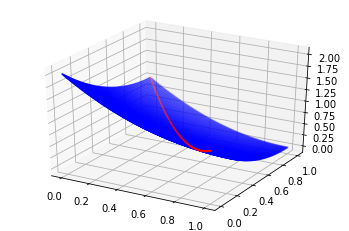

In [9]:
for lambda_ in np.linspace(0, 2, 11):
    lambda_ = round(lambda_, 1)
    print(lambda_)
    temp = calc_fx_gx_z(df, lambda_)
    plot_3d_graph(temp)